In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

In [2]:
df = pd.read_csv('home.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
med = math.floor(df.bedrooms.median())
med

4

In [4]:
df.bedrooms.fillna(med, inplace=True)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
mreg = linear_model.LinearRegression()
mreg.fit(df[['area','bedrooms','age']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
mreg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [7]:
mreg.intercept_

221323.0018654043

In [8]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


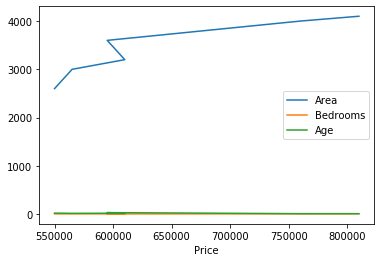

In [9]:
plt.xlabel('Price', fontsize=10)
plt.plot(df.price,df.area,label="Area")
plt.plot(df.price,df.bedrooms,label="Bedrooms")
plt.plot(df.price,df.age,label="Age")

plt.legend()

In [10]:
mreg.predict([[3000,3,40]])

array([498408.25158031])

# For installing package directly into jupyter notebook

In [13]:
import sys
!{sys.executable} -m pip install word2number

  Using cached word2number-1.1.zip (9.7 kB)
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5586 sha256=67b378af7a46fe0fc142a76af10ca1b5d009fc07a37bb7ba5c702ca372fd3557
  Stored in directory: /home/coder/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


# Exercise

In [30]:
from word2number import w2n
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [31]:
df.experience.fillna("zero",inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [32]:
med = df['test_score(out of 10)'].median()
med

8.0

In [33]:
df['test_score(out of 10)'].fillna(med,inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [34]:
df.experience = df.experience.apply(w2n.word_to_num)

In [35]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [37]:
exreg = linear_model.LinearRegression()
exreg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
exreg.predict([[2,9,6]])

array([53205.96797671])